# 🔧 Step 1: Install Required Packages

In this step, we install all the essential libraries for fine-tuning a transformer model with PEFT (Parameter-Efficient Fine-Tuning) and LoRA.

- `transformers`: Hugging Face library for pre-trained models.
- `datasets`: For loading standard NLP datasets.
- `accelerate`: Handles multi-GPU, mixed-precision training.
- `peft`: Implements LoRA and other efficient fine-tuning techniques.
- `trl`: Helpful tools for supervised fine-tuning and RLHF.

In [ ]:
# Install required packages
!pip install transformers datasets accelerate peft trl -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.6/504.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.3 MB/s eta 0:00:00


# 🔧 Step 2: Import Required Libraries

In this step, we import all the essential libraries and classes needed for fine-tuning and working with our model.

## 📦 Libraries Imported:
- **torch**: Core PyTorch library for deep learning operations.
- **datasets.load_dataset**: To easily load NLP datasets.
- **AutoTokenizer**: Automatically loads the tokenizer for our chosen model.
- **AutoModelForSeq2SeqLM**: Loads a pre-trained sequence-to-sequence model (e.g., T5, BART).
- **Seq2SeqTrainer** & **Seq2SeqTrainingArguments**: Trainer utilities specifically for seq2seq models.
- **DataCollatorForSeq2Seq**: Handles dynamic padding and batching for seq2seq models.
- **peft (LoRA)**: Provides tools for parameter-efficient fine-tuning, including:
  - `get_peft_model`: Wraps the base model with LoRA adapters.
  - `LoraConfig`: Defines LoRA configurations (rank, alpha, dropout, etc.).
  - `TaskType`: Specifies the task type (e.g., SEQ_2_SEQ_LM).
  - `PeftModel`: Loads and manages PEFT-trained models.

In [ ]:
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
from peft import get_peft_model, LoraConfig, TaskType, PeftModel

# 🔑 Step 3: Load Pre-trained Model and Tokenizer

In this step, we load the **FLAN-T5 Small** model and its corresponding tokenizer.

## 🛠️ What Happens Here?
- **`model_name`**: Specifies the pre-trained model we want to use (`google/flan-t5-small` in this case).
- **`AutoTokenizer.from_pretrained`**: Downloads and initializes the tokenizer for tokenizing input text into model-understandable tokens.
- **`AutoModelForSeq2SeqLM.from_pretrained`**: Loads the pre-trained FLAN-T5 model for sequence-to-sequence tasks (e.g., summarization, translation).

> 📝 **Why FLAN-T5 is a Good Choice?**  
> - **Instruction-tuned:** FLAN-T5 is already fine-tuned on a wide range of tasks (e.g., summarization, Q&A, reasoning), making it highly adaptable.  
> - **Lightweight & Efficient:** The `small` version is compact enough for fine-tuning on limited hardware (like Google Colab) while still performing well.  
> - **Strong Zero-shot & Few-shot Performance:** It generalizes well even with minimal task-specific data.  
> - **Flexible Architecture:** Its encoder-decoder (Seq2Seq) design works well for text-to-text tasks like summarization.  
> - **Great for PEFT (LoRA):** Compatible with parameter-efficient fine-tuning methods, reducing training cost while retaining quality.  


In [ ]:
# Load model and tokenizer
model_name = "google/flan-t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# 📂 Step 4: Load and Prepare Dataset

In this step, we load the **`xsum`** dataset (a summarization dataset) and prepare a small subset for training.

## 🛠️ What Happens Here?
- **`load_dataset("knkarthick/xsum")`**: Loads the XSum dataset, which contains dialogues and summaries for abstractive summarization tasks.
- **`select(range(1000))`**: Selects the first 1000 samples from the training split (useful for faster training/testing in Colab with limited resources).
- **`print()` statements**: Display a sample from the dataset and its column names to understand the data structure.

## 🔎 Why This Step?
- Helps verify that the dataset is loaded correctly.
- Confirms which columns (e.g., `dialogue` and `summary`) are available for preprocessing.

In [ ]:
# Load and prepare dataset
dataset = load_dataset("knkarthick/xsum")
train_dataset_01 = dataset["train"].select(range(1000))

# Show a sample to check column names
print("Sample data:")
print(train_dataset_01[0])
print("\nColumns:", train_dataset_01.column_names)

README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/480M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/26.3M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/26.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

Sample data:
{'id': 35232142, 'dialogue': 'The full cost of damage in Newton Stewart, one of the areas worst affected, is still being assessed.\nRepair work is ongoing in Hawick and many roads in Peeblesshire remain badly affected by standing water.\nTrains on the west coast mainline face disruption due to damage at the Lamington Viaduct.\nMany businesses and householders were affected by flooding in Newton Stewart after the River Cree overflowed into the town.\nFirst Minister Nicola Sturgeon visited the area to inspect the damage.\nThe waters breached a retaining wall, flooding many commercial properties on Victoria Street - the main shopping thoroughfare.\nJeanette Tate, who owns the Cinnamon Cafe which was badly affected, said she could not fault the multi-agency response once the flood hit.\nHowever, she said more preventative work could have been carried out to ensure the retaining wall did not fail.\n"It is difficult but I do think there is so much publicity for Dumfries and the 

# 🧹 Step 5: Filter Invalid Samples in Dataset

Before training, we ensure the dataset only contains **valid and non-empty examples**.

## 🛠️ What Happens Here?
- **Why Filtering?**  
  The dataset may contain empty or malformed entries. These can cause issues during tokenization or training.  
- **Column Names Handling:**  
  The XSum dataset typically uses `document` and `summary`. But some variations (or custom datasets) may have `dialogue` and `summary`.  
- **Custom Validation Function (`is_valid_example`)**:
  - Checks if the required columns exist (`document` or `dialogue`).
  - Ensures both the text (document/dialogue) and summary are **strings** and **non-empty**.

## 🔎 Why This Step?
- Prevents errors in tokenization by removing invalid data.
- Ensures the training process focuses only on clean, usable examples.
- Handles multiple dataset formats (like `document` vs. `dialogue`) dynamically.

In [ ]:
# Check the actual column names and fix the filter function
# The xsum dataset typically has 'document' and 'summary' columns
def is_valid_example(example):
    # Use the correct column names - check your print output above
    if 'document' in example:
        return (isinstance(example["document"], str) and
                isinstance(example["summary"], str) and
                len(example["document"].strip()) > 0 and
                len(example["summary"].strip()) > 0)
    elif 'dialogue' in example:
        return (isinstance(example["dialogue"], str) and
                isinstance(example["summary"], str) and
                len(example["dialogue"].strip()) > 0 and
                len(example["summary"].strip()) > 0)
    else:
        return False

# Filter the dataset first
print(f"Dataset size before filtering: {len(train_dataset_01)}")
filtered_dataset = train_dataset_01.filter(is_valid_example)
print(f"Dataset size after filtering: {len(filtered_dataset)}")

Dataset size before filtering: 1000


Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset size after filtering: 1000


In [ ]:
# Preprocessing function for batched processing
def preprocess(examples, tokenizer):
    """
    Preprocess function that works with batched=True
    examples is a dictionary where each value is a list
    """
    # Check which column exists and use it
    if 'document' in examples:
        inputs = ["summarize: " + doc for doc in examples["document"]]
    elif 'dialogue' in examples:
        inputs = ["summarize: " + doc for doc in examples["dialogue"]]
    else:
        raise ValueError("Neither 'document' nor 'dialogue' column found")

    targets = examples["summary"]

    # Tokenize inputs and targets
    model_inputs = tokenizer(
        inputs,
        max_length=512,
        padding="max_length",
        truncation=True,
        return_tensors=None
    )

    # Tokenize targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=128,
            padding="max_length",
            truncation=True,
            return_tensors=None
        )

    # Add labels to model inputs
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Create a preprocessing function with tokenizer bound
def preprocess_with_tokenizer(examples):
  return preprocess(examples, tokenizer)

# Apply preprocessing to the filtered dataset
print("Tokenizing dataset...")
tokenized_dataset_01 = filtered_dataset.map(preprocess_with_tokenizer, batched=True, remove_columns=filtered_dataset.column_names)

Tokenizing dataset...


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3950: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


# Step 6: Setup PEFT (LoRA) Configuration  

In this step, we configure **PEFT (Parameter-Efficient Fine-Tuning)** using **LoRA (Low-Rank Adaptation)** to fine-tune FLAN-T5 efficiently:  

- **`task_type=SEQ_2_SEQ_LM`** → Specifies we are using a sequence-to-sequence language model (like T5).  
- **`inference_mode=False`** → Ensures the model is in **training mode**, allowing LoRA layers to update their weights during fine-tuning.  
  - If set to `True`, the model would be in inference-only mode, freezing LoRA layers.  
- **`r=8`** → Rank of the low-rank matrices (controls trainable parameter size).  
- **`lora_alpha=16`** → Scaling factor that balances LoRA updates.  
- **`lora_dropout=0.1`** → Dropout applied to LoRA layers during training for regularization.  
- **`target_modules=["q", "v"]`** → Applies LoRA to the Query and Value projection layers of T5's attention blocks.  

Finally, we apply LoRA to the base model and print the **trainable parameter count**, confirming that only LoRA layers will be updated during training.


In [ ]:
# Setup PEFT (LoRA) configuration
peft_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    inference_mode=False,
    r=8,
    lora_alpha=16,
    lora_dropout=0.1,
    target_modules=["q", "v"]  # Specify target modules for T5
)

# Apply PEFT to the model
model = get_peft_model(model, peft_config)
print("Trainable parameters:")
model.print_trainable_parameters()

Trainable parameters:
trainable params: 344,064 || all params: 77,305,216 || trainable%: 0.4451


# Step 7: Setup Training Arguments  

We define the **training configuration** using `Seq2SeqTrainingArguments` to control how our model is fine-tuned:  

### Key Parameters:  
- **`output_dir="./checkpoint_dir"`** → Directory to save model checkpoints after each epoch.  
- **`per_device_train_batch_size=4`** → Batch size per device (GPU/CPU).  
- **`gradient_accumulation_steps=2`** → Accumulate gradients over 2 steps to effectively increase the batch size without using extra GPU memory.  
- **`num_train_epochs=3`** → Train for 3 epochs over the dataset.  
- **`learning_rate=2e-4`** → The learning rate for the optimizer.  
- **`logging_dir="./logs"`** → Directory to store training logs for tracking progress.  
- **`logging_steps=10`** → Log training metrics every 10 steps.  
- **`save_strategy="epoch"`** → Save a checkpoint after every epoch.  
- **`eval_strategy="no"`** → Skip evaluation during training (can be added later).  
- **`fp16=True`** → Enable mixed-precision training for faster performance and lower memory usage.  
- **`report_to="none"`** → Disable integrations like W&B or TensorBoard for logging.  
- **`remove_unused_columns=False`** → Prevents automatic column removal in the dataset (needed for Seq2Seq).  
- **`dataloader_pin_memory=False`** → Disable pinning memory to avoid issues in some environments (like Colab).  

These arguments ensure **efficient, memory-friendly, and stable fine-tuning** while saving progress at the end of each epoch.


In [ ]:
# Setup training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./checkpoint_dir",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=2,
    num_train_epochs=3,
    learning_rate=2e-4,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    eval_strategy="no",
    fp16=True,  # Keep mixed precision for speed
    report_to="none",
    remove_unused_columns=False,
    dataloader_pin_memory=False,
)

# Step 8: Setup Data Collator and Trainer  

Now, we prepare the **data collator** and initialize the `Seq2SeqTrainer` to handle training.  

### 🔹 **Data Collator**  
- We use `DataCollatorForSeq2Seq` to dynamically **pad sequences** in each batch to the same length, improving efficiency.  
- It ensures proper alignment of inputs and labels for sequence-to-sequence tasks like summarization.  

### 🔹 **Trainer Setup**  
We initialize the `Seq2SeqTrainer` with:  
- **`model`** → The LoRA-enabled FLAN-T5 model.  
- **`args`** → Training arguments defined in Step 7.  
- **`train_dataset`** → The tokenized training dataset.  
- **`tokenizer`** → Handles text-to-token conversions during training.  
- **`data_collator`** → Ensures batches are padded correctly.  

### 🔹 **Start Training**  
Finally, we call `trainer.train()` to begin fine-tuning. This will:  
✅ Train for the specified number of epochs.  
✅ Save checkpoints (as per `save_strategy`).  
✅ Log progress at defined intervals (`logging_steps`).  

This step launches the **fine-tuning process** using Hugging Face’s `Seq2SeqTrainer`, optimized for sequence-to-sequence tasks like text summarization.


In [ ]:
# Setup data collator
data_collator = DataCollatorForSeq2Seq(
    tokenizer=tokenizer,
    model=model,
    padding=True
)

# Setup trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset_01,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Start training
print("Starting training...")
trainer.train()

/tmp/ipython-input-9-4272266664.py:9: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Starting training...


Step,Training Loss
10,36.970300
20,36.045800
30,35.781200
40,33.395400
50,31.064500
60,28.414000
70,25.328900
80,22.734100
90,20.334600
100,17.061400


TrainOutput(global_step=375, training_loss=11.882035186767578, metrics={'train_runtime': 4429.4297, 'train_samples_per_second': 0.677, 'train_steps_per_second': 0.085, 'total_flos': 560842407936000.0, 'train_loss': 11.882035186767578, 'epoch': 3.0})

# Step 9: Save Model and Log Training  

In this step, we save the fine-tuned model and record the training details for future reference.  

---

### 🔹 **Saving the Model and Tokenizer**
- Use `trainer.save_model("./adapters/session1")` to save the LoRA-adapted model.
- Save the tokenizer with `tokenizer.save_pretrained("./adapters/session1")` so it can be reused for inference or further training.

This ensures that both the model weights and tokenizer configuration are stored together in a session-specific folder (`session1`).

---

### 🔹 **Logging Training Information**
We define a `log_training` function to record important training details in `./logs/training_logs.csv`.  
Each entry includes:
- **Session Name** (e.g., `session1`)  
- **Timestamp** (when training was completed)  
- **Number of Epochs**  
- **Dataset Size** (number of samples used)  
- **Final Loss** (from the trainer's log history)  

This helps track different training sessions systematically.

In [ ]:
# Save the model
print("Saving model...")
trainer.save_model("./adapters/session1")
tokenizer.save_pretrained("./adapters/session1")

Saving model...


('./adapters/session1/tokenizer_config.json',
 './adapters/session1/special_tokens_map.json',
 './adapters/session1/spiece.model',
 './adapters/session1/added_tokens.json',
 './adapters/session1/tokenizer.json')

In [ ]:
import csv
from datetime import datetime

def log_training(session, epochs, dataset_size, loss):
    with open("./logs/training_logs.csv", mode="a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([session, datetime.now(), epochs, dataset_size, loss])


In [ ]:
print(tokenized_dataset_01.column_names)

['input_ids', 'attention_mask', 'labels']


In [ ]:
len(tokenized_dataset_01["input_ids"])

1000

In [ ]:
# After training, log the session info
log_training(
    session="session1",
    epochs=3,
    dataset_size=len(tokenized_dataset_01["input_ids"]),
    loss=trainer.state.log_history[-1].get("loss", "N/A")
)

# 🔬 Step 10: Model Testing & Evaluation

After fine-tuning our model, this step provides **various testing and evaluation utilities** to verify the model’s performance using sample data, custom inputs, and quantitative metrics.

---

## 🔧 **Functions Overview**
We define a set of functions to streamline model testing:

---

### 1️⃣ **Model Loading Functions**
- **`load_finetuned_model()`**  
  Loads the fine-tuned LoRA (PEFT) model along with its tokenizer from a specified directory.
  
- **`load_base_model()`**  
  Loads the original base model (`google/flan-t5-small`) for comparison against the fine-tuned version.

---

### 2️⃣ **Summary Generation**
- **`generate_summary(model, tokenizer, text)`**  
  Generates a summary for any input text using beam search for higher quality outputs.

---

### 3️⃣ **Testing Options**
- **`test_with_sample_data()`**  
  Tests both base and fine-tuned models on sample examples from the **XSum dataset**.

- **`test_with_custom_text()`**  
  Runs tests on predefined custom texts (e.g., climate change, AI advancements, COVID-19 impact).

- **`interactive_testing()`**  
  Interactive mode where you can enter your own text and get a summary in real-time.

---

### 4️⃣ **Model Evaluation**
- **`evaluate_model_metrics()`**  
  Evaluates the fine-tuned model using **ROUGE metrics** (ROUGE-1, ROUGE-2, ROUGE-L) over 100 test samples.

---

### 5️⃣ **Main Testing Menu**
- **`main_testing()`**  
  Provides an interactive menu with options to:
  - Test using dataset samples  
  - Test with predefined texts  
  - Perform interactive text summarization  
  - Evaluate using ROUGE  
  - Run all tests together  

---

## 🖥️ **Usage Example**
Once this setup is executed, you can use the following commands:
```python
main_testing()                # Launch interactive menu
test_with_sample_data()       # Test on dataset examples
test_with_custom_text()       # Test predefined texts
interactive_testing()         # Input your own text
evaluate_model_metrics()      # Evaluate using ROUGE metrics


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from peft import PeftModel
from datasets import load_dataset
import random

# # Configuration
# model_name = "google/flan-t5-small"  # Base model
# finetuned_model_path = "./adapters/session1"  # Your fine-tuned model path

def load_finetuned_model():
    """Load the fine-tuned model and tokenizer"""
    print("Loading fine-tuned model...")

    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(finetuned_model_path)

    # Load base model
    base_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    # Load fine-tuned PEFT model
    model = PeftModel.from_pretrained(base_model, finetuned_model_path)

    # Set to evaluation mode
    model.eval()

    print("Model loaded successfully!")
    return model, tokenizer

def load_base_model():
    """Load the original base model for comparison"""
    print("Loading base model for comparison...")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    model.eval()
    return model, tokenizer

def generate_summary(model, tokenizer, text, max_length=128):
    """Generate summary for given text"""
    # Prepare input
    input_text = "summarize: " + text

    # Tokenize
    inputs = tokenizer(
        input_text,
        max_length=512,
        truncation=True,
        padding=True,
        return_tensors="pt"
    )

    # Move inputs to same device as model
    device = next(model.parameters()).device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Generate
    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            num_beams=4,  # Use beam search for better quality
            length_penalty=2.0,  # Encourage longer summaries
            early_stopping=True,
            do_sample=False  # Deterministic output
        )

    # Decode
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

def test_with_sample_data():
    """Test with sample data from the dataset"""
    print("=== Testing with Sample Data ===")

    # Load models
    ft_model, ft_tokenizer = load_finetuned_model()
    base_model, base_tokenizer = load_base_model()

    # Load test data
    dataset = load_dataset("knkarthick/xsum")
    test_data = dataset["test"].select(range(5))  # Get 5 test examples

    for i, example in enumerate(test_data):
        print(f"\n--- Example {i+1} ---")

        # Get the document (check column name)
        if 'document' in example:
            document = example['document']
        elif 'dialogue' in example:
            document = example['dialogue']
        else:
            print("Column not found!")
            continue

        reference_summary = example['summary']

        print(f"📄 Original Document (first 300 chars):")
        print(document[:300] + "..." if len(document) > 300 else document)
        print(f"\n🎯 Reference Summary:")
        print(reference_summary)

        # Generate with fine-tuned model
        ft_summary = generate_summary(ft_model, ft_tokenizer, document)
        print(f"\n🤖 Fine-tuned Model Summary:")
        print(ft_summary)

        # Generate with base model
        base_summary = generate_summary(base_model, base_tokenizer, document)
        print(f"\n📝 Base Model Summary:")
        print(base_summary)

        print("\n" + "="*80)

def test_with_custom_text(model_loading_func):
    """Test with custom text"""
    print("=== Testing with Custom Text ===")

    # Load fine-tuned model
    ft_model, ft_tokenizer = model_loading_func()

    # Custom test texts
    test_texts = [
        """
        Climate change is one of the most pressing issues of our time. Rising global temperatures
        are causing ice caps to melt, sea levels to rise, and weather patterns to become more extreme.
        Scientists agree that human activities, particularly the burning of fossil fuels, are the
        primary cause of these changes. Governments and organizations worldwide are working to reduce
        carbon emissions and transition to renewable energy sources. However, the challenge is enormous
        and requires coordinated global action to address effectively.
        """,

        """
        Artificial intelligence has revolutionized many industries in recent years. Machine learning
        algorithms can now perform tasks that were once thought to be exclusively human, such as
        recognizing images, understanding natural language, and making complex decisions. Companies
        are using AI to improve customer service, optimize operations, and develop new products.
        However, the rapid advancement of AI also raises concerns about job displacement, privacy,
        and the need for proper regulation to ensure its responsible development and deployment.
        """,

        """
        The COVID-19 pandemic has fundamentally changed how we work and live. Remote work became
        the norm for millions of employees worldwide, leading to a massive shift in workplace culture.
        Many companies discovered that employees could be just as productive working from home,
        leading to permanent changes in work arrangements. The pandemic also accelerated digital
        transformation across industries, with businesses rapidly adopting new technologies to
        maintain operations and serve customers in a socially distanced world.
        """
    ]

    for i, text in enumerate(test_texts):
        print(f"\n--- Custom Text {i+1} ---")
        print(f"📄 Original Text:")
        print(text.strip())

        # Generate summary
        summary = generate_summary(ft_model, ft_tokenizer, text.strip())
        print(f"\n🤖 Generated Summary:")
        print(summary)
        print("\n" + "="*80)

def interactive_testing():
    """Interactive testing - input your own text"""
    print("=== Interactive Testing ===")
    print("Enter your text to summarize (or 'quit' to exit):")

    # Load fine-tuned model
    ft_model, ft_tokenizer = load_finetuned_model()

    while True:
        print("\n" + "-"*50)
        user_input = input("\nEnter text to summarize: ").strip()

        if user_input.lower() in ['quit', 'exit', 'q']:
            print("Goodbye!")
            break

        if not user_input:
            print("Please enter some text.")
            continue

        print(f"\n📄 Your Text:")
        print(user_input)

        # Generate summary
        summary = generate_summary(ft_model, ft_tokenizer, user_input)
        print(f"\n🤖 Generated Summary:")
        print(summary)

def evaluate_model_metrics():
    """Evaluate model with ROUGE metrics (optional)"""
    try:
        from rouge_score import rouge_scorer

        print("=== Model Evaluation with ROUGE Metrics ===")

        # Load models
        ft_model, ft_tokenizer = load_finetuned_model()

        # Load test data
        dataset = load_dataset("knkarthick/xsum")
        test_data = dataset["test"].select(range(100))  # Evaluate on 100 examples

        scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

        rouge1_scores = []
        rouge2_scores = []
        rougeL_scores = []

        print("Evaluating...")
        for i, example in enumerate(test_data):
            if i % 20 == 0:
                print(f"Processed {i}/100 examples...")

            # Get document
            if 'document' in example:
                document = example['document']
            elif 'dialogue' in example:
                document = example['dialogue']
            else:
                continue

            reference = example['summary']

            # Generate summary
            generated = generate_summary(ft_model, ft_tokenizer, document)

            # Calculate ROUGE scores
            scores = scorer.score(reference, generated)
            rouge1_scores.append(scores['rouge1'].fmeasure)
            rouge2_scores.append(scores['rouge2'].fmeasure)
            rougeL_scores.append(scores['rougeL'].fmeasure)

        # Print average scores
        print(f"\n📊 Evaluation Results:")
        print(f"ROUGE-1: {sum(rouge1_scores)/len(rouge1_scores):.4f}")
        print(f"ROUGE-2: {sum(rouge2_scores)/len(rouge2_scores):.4f}")
        print(f"ROUGE-L: {sum(rougeL_scores)/len(rougeL_scores):.4f}")

    except ImportError:
        print("ROUGE scorer not installed. Install with: pip install rouge-score")
        print("Skipping ROUGE evaluation...")

# Main testing menu
def main_testing():
    """Main testing interface"""
    print("🔬 Fine-tuned Model Testing Interface")
    print("=====================================")
    print("Choose testing option:")
    print("1. Test with sample data from dataset")
    print("2. Test with custom predefined texts")
    print("3. Interactive testing (enter your own text)")
    print("4. Evaluate with ROUGE metrics")
    print("5. Run all tests")

    choice = input("\nEnter your choice (1-5): ").strip()

    if choice == "1":
        test_with_sample_data()
    elif choice == "2":
        test_with_custom_text()
    elif choice == "3":
        interactive_testing()
    elif choice == "4":
        evaluate_model_metrics()
    elif choice == "5":
        test_with_sample_data()
        test_with_custom_text()
        evaluate_model_metrics()
    else:
        print("Invalid choice!")

# Usage examples:
print("🚀 Model Testing Setup Complete!")
print("\nAvailable functions:")
print("- main_testing(): Interactive testing menu")
print("- test_with_sample_data(): Test with dataset samples")
print("- test_with_custom_text(): Test with predefined texts")
print("- interactive_testing(): Enter your own text")
print("- evaluate_model_metrics(): ROUGE score evaluation")
print("\nTo start testing, run: main_testing()")

🚀 Model Testing Setup Complete!

Available functions:
- main_testing(): Interactive testing menu
- test_with_sample_data(): Test with dataset samples
- test_with_custom_text(): Test with predefined texts
- interactive_testing(): Enter your own text
- evaluate_model_metrics(): ROUGE score evaluation

To start testing, run: main_testing()


In [ ]:
model_name = "google/flan-t5-small"  # Base model
finetuned_model_path = "./adapters/session1"

In [ ]:
test_with_custom_text(load_base_model)

=== Testing with Custom Text ===
Loading base model for comparison...

--- Custom Text 1 ---
📄 Original Text:
Climate change is one of the most pressing issues of our time. Rising global temperatures
        are causing ice caps to melt, sea levels to rise, and weather patterns to become more extreme.
        Scientists agree that human activities, particularly the burning of fossil fuels, are the
        primary cause of these changes. Governments and organizations worldwide are working to reduce
        carbon emissions and transition to renewable energy sources. However, the challenge is enormous
        and requires coordinated global action to address effectively.

🤖 Generated Summary:
Climate change is one of the most pressing issues of our time.


--- Custom Text 2 ---
📄 Original Text:
Artificial intelligence has revolutionized many industries in recent years. Machine learning
        algorithms can now perform tasks that were once thought to be exclusively human, such as
      

In [ ]:
test_with_custom_text(load_finetuned_model)

=== Testing with Custom Text ===
Loading fine-tuned model...
Model loaded successfully!

--- Custom Text 1 ---
📄 Original Text:
Climate change is one of the most pressing issues of our time. Rising global temperatures
        are causing ice caps to melt, sea levels to rise, and weather patterns to become more extreme.
        Scientists agree that human activities, particularly the burning of fossil fuels, are the
        primary cause of these changes. Governments and organizations worldwide are working to reduce
        carbon emissions and transition to renewable energy sources. However, the challenge is enormous
        and requires coordinated global action to address effectively.

🤖 Generated Summary:
Climate change is one of the most pressing issues of our time.


--- Custom Text 2 ---
📄 Original Text:
Artificial intelligence has revolutionized many industries in recent years. Machine learning
        algorithms can now perform tasks that were once thought to be exclusively hum

# ------------------------------------------------------

# 🔄 Step 11.1: Resuming Training from a Specific Checkpoint (Session 2)

In this step, we demonstrate how to **resume training** from a specific checkpoint in a new session. This is useful when:
- Training was interrupted and needs continuation.
- You want to extend training with new epochs or data.
- Fine-tuning needs to be done incrementally in multiple sessions.

---

## 🗂️ **Checkpoint Directory Validation**
We first verify if the checkpoint directory (`./checkpoint_dir`) exists. This ensures that previously saved checkpoints are available for resuming.

---

## 🔍 **Listing Available Checkpoints**
We define `list_available_checkpoints()`:
- Lists all checkpoints stored in `./checkpoint_dir`.
- Displays them in sorted order based on step numbers for easy selection.

---

## 🏗️ **Model and Tokenizer Setup**
The function `setup_model_and_tokenizer()`:
- Loads the **base model** (`google/flan-t5-small`) and tokenizer.
- Applies **PEFT (LoRA)** configuration to prepare the model for resumed fine-tuning.

---

## ⏩ **Resuming from a Specific Checkpoint**
The core function `resume_from_specific_checkpoint(checkpoint_step)`:
1. **Locate Checkpoint:**  
   Builds the path to the selected checkpoint (e.g., `checkpoint-375`).
   
2. **Load Model & Tokenizer:**  
   Initializes the model with PEFT applied and loads tokenizer.

3. **Filter & Tokenize Dataset:**  
   Filters dataset using `is_valid_example` and tokenizes it using a tokenizer-bound preprocessing function.

4. **Define Training Arguments:**  
   Uses `resume_from_checkpoint` to continue training from the selected checkpoint.

5. **Initialize Trainer:**  
   Prepares `Seq2SeqTrainer` with model, dataset, and data collator.

6. **Resume Training:**  
   Calls `trainer.train(resume_from_checkpoint=checkpoint_path)` to continue fine-tuning.

7. **Save Final Model:**  
   After training completes, saves the new adapter and tokenizer in `./adapters/session2`.

8. **Log Training:**  
   Appends session details (session name, epochs, dataset size, and final loss) to the training log.

---

## ⚙️ **Key Variables:**
- `checkpoint_dir` → Directory where checkpoints are saved.
- `final_model_dir` → Directory where the resumed model will be stored.
- `train_dataset` → Dataset slice for this session (e.g., samples 1000–2000).
- `model_name` → Base model name (`google/flan-t5-small`).
- `epochs_count` → Number of epochs for resumed training.

---

## ▶️ **Execution Example**
Here, we resume training from **checkpoint-375**:
```python
resume_from_specific_checkpoint(checkpoint_step=375)


In [ ]:
import os

directory_path = "./checkpoint_dir"

if os.path.isdir(directory_path):
    print("Directory exists.")
else:
    print("Directory does not exist.")


Directory exists.


In [ ]:
# Usage functions
def list_available_checkpoints():
    """List all available checkpoints"""
    if not os.path.exists(checkpoint_dir):
        print(f"Checkpoint directory {checkpoint_dir} does not exist.")
        return []

    checkpoints = [f for f in os.listdir(checkpoint_dir) if f.startswith("checkpoint-")]
    checkpoints = sorted(checkpoints, key=lambda x: int(x.split('-')[1]))

    print("Available checkpoints:")
    for cp in checkpoints:
        step = cp.split('-')[1]
        print(f"  - Step {step}: {cp}")

    return checkpoints

In [ ]:
import os

# Extracts the last part of the path which is session number
extract_session = lambda path: path.split("/")[-1]

def setup_model_and_tokenizer():
    """Setup model and tokenizer"""
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    # Setup PEFT (LoRA) configuration
    peft_config = LoraConfig(
        task_type=TaskType.SEQ_2_SEQ_LM,
        inference_mode=False,
        r=8,
        lora_alpha=16,
        lora_dropout=0.1,
        target_modules=["q", "v"]
    )

    # Apply PEFT to the model
    model = get_peft_model(model, peft_config)
    return model, tokenizer

def resume_from_specific_checkpoint(checkpoint_step):
    """Resume from a specific checkpoint step"""
    checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint-{checkpoint_step}")
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found!")
        print("Available checkpoints:")
        if os.path.exists(checkpoint_dir):
            checkpoints = [f for f in os.listdir(checkpoint_dir) if f.startswith("checkpoint-")]
            for cp in sorted(checkpoints):
                print(f"  - {cp}")
        return None

    print(f"Resuming from specific checkpoint: {checkpoint_path}")

    # Setup model and tokenizer
    model, tokenizer = setup_model_and_tokenizer()

    print("Trainable parameters:")
    model.print_trainable_parameters()

    # Prepare dataset
    print(f"Dataset size before filtering: {len(train_dataset)}")
    filtered_dataset = train_dataset.filter(is_valid_example)
    print(f"Dataset size after filtering: {len(filtered_dataset)}")

    # Create a preprocessing function with tokenizer bound
    def preprocess_with_tokenizer(examples):
        return preprocess(examples, tokenizer)

    # Tokenize dataset
    tokenized_dataset = filtered_dataset.map(
        preprocess_with_tokenizer,
        batched=True,
        remove_columns=filtered_dataset.column_names
    )

    # Training arguments
    training_args = Seq2SeqTrainingArguments(
        output_dir=checkpoint_dir,  # Continue saving in same directory
        per_device_train_batch_size=4,
        gradient_accumulation_steps=2,
        num_train_epochs=epochs_count,
        learning_rate=2e-4,
        logging_dir="./logs",
        logging_steps=10,
        # save_strategy="steps",
        # save_steps=50,
        eval_strategy="no",
        fp16=True,
        report_to="none",
        remove_unused_columns=False,
        dataloader_pin_memory=False,
        resume_from_checkpoint=checkpoint_path,
    )

    # Data collator
    data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, padding=True)

    # Trainer
    trainer = Seq2SeqTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset,
        tokenizer=tokenizer,
        data_collator=data_collator,
    )

    # Resume training
    print("Starting resumed training...")
    trainer.train(resume_from_checkpoint=checkpoint_path)

    # Save final model
    print(f"Saving final model to: {final_model_dir}")
    os.makedirs(final_model_dir, exist_ok=True)
    trainer.save_model(final_model_dir)
    tokenizer.save_pretrained(final_model_dir)

    print("Training completed and model saved!")

    # After training, log the session info
    log_training(
        session=extract_session(final_model_dir),
        epochs=epochs_count,
        dataset_size=len(tokenized_dataset["input_ids"]),
        loss=trainer.state.log_history[-1].get("loss", "N/A")
    )

    return trainer


In [ ]:
checkpoint_dir = "./checkpoint_dir"
final_model_dir = "./adapters/session2"
train_dataset = dataset["train"].select(range(1000,2000))
model_name = "google/flan-t5-small"
epochs_count = 6

In [ ]:
resume_from_specific_checkpoint(checkpoint_step=375)

Resuming from specific checkpoint: ./checkpoint_dir/checkpoint-375
Trainable parameters:
trainable params: 344,064 || all params: 77,305,216 || trainable%: 0.4451
Dataset size before filtering: 1000
Dataset size after filtering: 1000


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3950: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/tmp/ipython-input-24-1398203315.py:89: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Starting resumed training...


Step,Training Loss
380,4.455500
390,4.437200
400,4.394200
410,4.372200
420,4.381200
430,4.378400
440,4.347200
450,4.256300
460,4.270500
470,4.272600


Saving final model to: ./adapters/session2
Training completed and model saved!


# 🔄 Step 11.2: Resuming Training from a Specific Checkpoint (Session 3)

In this step, we continue fine-tuning the model by **resuming from a later checkpoint**. This is part of our incremental training strategy where we progressively fine-tune over different dataset slices across multiple sessions.

---

## ⚙️ **Configuration for Session 3**
- **Checkpoint Directory:**  
  `checkpoint_dir = "./checkpoint_dir"`  
  Stores all intermediate training checkpoints.
  
- **Final Model Directory:**  
  `final_model_dir = "./adapters/session3"`  
  Directory where the fine-tuned model from this session will be saved.

- **Dataset Slice:**  
  `train_dataset = dataset["train"].select(range(2000,3000))`  
  Uses samples **2000–3000** from the XSum dataset for this session.

- **Base Model:**  
  `model_name = "google/flan-t5-small"`  
  The same base model is used to maintain consistency across sessions.

- **Epoch Count:**  
  `epochs_count = 9`  
  Specifies the number of epochs for this session.

---

## ▶️ **Resuming from Checkpoint**
We resume training from:
```python
resume_from_specific_checkpoint(checkpoint_step=750)


In [ ]:
checkpoint_dir = "./checkpoint_dir"
final_model_dir = "./adapters/session3"
train_dataset = dataset["train"].select(range(2000,3000))
model_name = "google/flan-t5-small"
epochs_count = 9

In [ ]:
resume_from_specific_checkpoint(checkpoint_step=750)

Resuming from specific checkpoint: ./checkpoint_dir/checkpoint-750
Trainable parameters:
trainable params: 344,064 || all params: 77,305,216 || trainable%: 0.4451
Dataset size before filtering: 1000


Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset size after filtering: 1000


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3950: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/tmp/ipython-input-24-1398203315.py:89: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Starting resumed training...


Step,Training Loss
760,4.046900
770,4.076900
780,4.031100
790,4.013400
800,4.099000
810,3.996200
820,3.991300
830,3.966200
840,3.925500
850,4.016200


Saving final model to: ./adapters/session3
Training completed and model saved!


# 🔄 Step 11.3: Resuming Training from a Specific Checkpoint (Session 4)

In this step, we **continue fine-tuning the model** by resuming from the latest checkpoint. This is the fourth incremental training session, focusing on a new slice of the dataset to further improve performance.

---

## ⚙️ **Configuration for Session 4**
- **Checkpoint Directory:**  
  `checkpoint_dir = "./checkpoint_dir"`  
  Stores all previously saved training checkpoints.

- **Final Model Directory:**  
  `final_model_dir = "./adapters/session4"`  
  Directory where the model fine-tuned in this session will be saved.

- **Dataset Slice:**  
  `train_dataset = dataset["train"].select(range(3000,4000))`  
  Uses samples **3000–4000** from the XSum dataset for training in this session.

- **Base Model:**  
  `model_name = "google/flan-t5-small"`  
  Same base model as previous sessions to ensure consistency.

- **Epoch Count:**  
  `epochs_count = 12`  
  This session runs for **12 epochs** to further refine model weights.

---

## ▶️ **Resuming from Checkpoint**
We resume training from:
```python
resume_from_specific_checkpoint(checkpoint_step=1125)


In [ ]:
checkpoint_dir = "./checkpoint_dir"
final_model_dir = "./adapters/session4"
train_dataset = dataset["train"].select(range(3000,4000))
model_name = "google/flan-t5-small"
epochs_count = 12

In [ ]:
resume_from_specific_checkpoint(checkpoint_step=1125)

Resuming from specific checkpoint: ./checkpoint_dir/checkpoint-1125
Trainable parameters:
trainable params: 344,064 || all params: 77,305,216 || trainable%: 0.4451
Dataset size before filtering: 1000


Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset size after filtering: 1000


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3950: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/tmp/ipython-input-28-3058956283.py:84: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Starting resumed training...


Step,Training Loss
1130,3.740300
1140,3.793100
1150,3.783900
1160,3.777400
1170,3.841400
1180,3.752300
1190,3.766200
1200,3.730100
1210,3.703600
1220,3.711000


Saving final model to: ./adapters/session4
Training completed and model saved!


# 🔄 Step 11.4: Resuming Training from a Specific Checkpoint (Session 5)

As above, we continue fine-tuning the **FLAN-T5 Small** model using **progressive training sessions**. This is the **fifth session**, where we resume training from the latest checkpoint while focusing on a new dataset split.

---

## ⚙️ **Configuration for Session 5**
- **Checkpoint Directory:**  
  `checkpoint_dir = "./checkpoint_dir"`  
  (Same directory as used in earlier sessions to access saved checkpoints.)

- **Final Model Directory:**  
  `final_model_dir = "./adapters/session5"`  
  Stores the fine-tuned adapter from this session.

- **Dataset Slice:**  
  `train_dataset = dataset["train"].select(range(4000,5000))`  
  Trains on samples **4000–5000**, continuing the progressive training approach.

- **Base Model:**  
  `model_name = "google/flan-t5-small"`  
  Same base model to maintain consistency across sessions.

- **Epoch Count:**  
  `epochs_count = 15`  
  Runs **15 epochs** in this session to further refine weights.

---

## ▶️ **Checkpoint Resumption**
We resume from:
```python
resume_from_specific_checkpoint(checkpoint_step=1500)


In [ ]:
checkpoint_dir = "./checkpoint_dir"
final_model_dir = "./adapters/session5"
train_dataset = dataset["train"].select(range(4000,5000))
model_name = "google/flan-t5-small"
epochs_count = 15

In [ ]:
resume_from_specific_checkpoint(checkpoint_step=1500)

Resuming from specific checkpoint: ./checkpoint_dir/checkpoint-1500
Trainable parameters:
trainable params: 344,064 || all params: 77,305,216 || trainable%: 0.4451
Dataset size before filtering: 1000


Filter:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset size after filtering: 1000


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3950: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/tmp/ipython-input-28-3058956283.py:84: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Starting resumed training...


Step,Training Loss
1510,3.560100
1520,3.585700
1530,3.591800
1540,3.613300
1550,3.569900
1560,3.525800
1570,3.521300
1580,3.607100
1590,3.497200
1600,3.528100


Saving final model to: ./adapters/session5
Training completed and model saved!


# 🔍 Step 12: Testing Fine-Tuned Models from Different Sessions

After progressively fine-tuning the **FLAN-T5 Small** model across multiple sessions, we now test the performance of the adapters generated in **Sessions 3, 4, and 5**.  

This evaluation uses the `test_with_custom_text` function to generate summaries for predefined custom texts and compare the quality of outputs across sessions.

In [ ]:
model_name = "google/flan-t5-small"  # Base model
finetuned_model_path = "./adapters/session3"
test_with_custom_text(load_finetuned_model)

=== Testing with Custom Text ===
Loading fine-tuned model...
Model loaded successfully!

--- Custom Text 1 ---
📄 Original Text:
Climate change is one of the most pressing issues of our time. Rising global temperatures
        are causing ice caps to melt, sea levels to rise, and weather patterns to become more extreme.
        Scientists agree that human activities, particularly the burning of fossil fuels, are the
        primary cause of these changes. Governments and organizations worldwide are working to reduce
        carbon emissions and transition to renewable energy sources. However, the challenge is enormous
        and requires coordinated global action to address effectively.

🤖 Generated Summary:
Climate change is one of the most pressing issues of our time.


--- Custom Text 2 ---
📄 Original Text:
Artificial intelligence has revolutionized many industries in recent years. Machine learning
        algorithms can now perform tasks that were once thought to be exclusively hum

In [ ]:
model_name = "google/flan-t5-small"  # Base model
finetuned_model_path = "./adapters/session4"
test_with_custom_text(load_finetuned_model)

=== Testing with Custom Text ===
Loading fine-tuned model...
Model loaded successfully!

--- Custom Text 1 ---
📄 Original Text:
Climate change is one of the most pressing issues of our time. Rising global temperatures
        are causing ice caps to melt, sea levels to rise, and weather patterns to become more extreme.
        Scientists agree that human activities, particularly the burning of fossil fuels, are the
        primary cause of these changes. Governments and organizations worldwide are working to reduce
        carbon emissions and transition to renewable energy sources. However, the challenge is enormous
        and requires coordinated global action to address effectively.

🤖 Generated Summary:
Climate change is one of the most pressing issues of our time, and it's one of the most pressing.


--- Custom Text 2 ---
📄 Original Text:
Artificial intelligence has revolutionized many industries in recent years. Machine learning
        algorithms can now perform tasks that were

In [ ]:
model_name = "google/flan-t5-small"  # Base model
finetuned_model_path = "./adapters/session5"
test_with_custom_text(load_finetuned_model)

=== Testing with Custom Text ===
Loading fine-tuned model...
Model loaded successfully!

--- Custom Text 1 ---
📄 Original Text:
Climate change is one of the most pressing issues of our time. Rising global temperatures
        are causing ice caps to melt, sea levels to rise, and weather patterns to become more extreme.
        Scientists agree that human activities, particularly the burning of fossil fuels, are the
        primary cause of these changes. Governments and organizations worldwide are working to reduce
        carbon emissions and transition to renewable energy sources. However, the challenge is enormous
        and requires coordinated global action to address effectively.

🤖 Generated Summary:
Climate change is one of the most pressing issues of our time, and it is one of the most pressing.


--- Custom Text 2 ---
📄 Original Text:
Artificial intelligence has revolutionized many industries in recent years. Machine learning
        algorithms can now perform tasks that wer

# 📊Step 13: Model Evaluation and ROUGE Score Analysis

In this section, we set up a **comprehensive evaluation framework** to compare multiple model versions using **ROUGE scores**, a popular metric for text summarization quality.

---

## 🔧 **Step 1: Install Required Packages**
We start by installing and importing essential libraries:
- **transformers, datasets, peft** → For model loading and fine-tuning.
- **rouge-score, nltk** → For evaluation metrics.
- **pandas, matplotlib, seaborn** → For result visualization.

---

## 🏗️ **Step 2: Define the `ModelEvaluator` Class**
We create a reusable **`ModelEvaluator`** class to:
- **Load models** (base, fine-tuned, or checkpoint-based).
- **Generate summaries** using the model.
- **Evaluate using ROUGE scores** (ROUGE-1, ROUGE-2, ROUGE-L).
- **Compare multiple models** systematically.
- **Visualize results** through bar plots and tables.

---

### ✨ **Key Methods in `ModelEvaluator`:**
1. **`load_base_model()`** → Loads the original `google/flan-t5-small` base model.
2. **`load_finetuned_model(path)`** → Loads a LoRA fine-tuned model.
3. **`load_checkpoint_model(path)`** → Loads a specific checkpoint version.
4. **`generate_summary()`** → Generates model predictions for a given text.
5. **`evaluate_model()`** → Computes average ROUGE scores on a test dataset.
6. **`compare_models()`** → Evaluates multiple model versions for comparison.
7. **`create_comparison_table()`** → Displays results as a clean table.
8. **`plot_comparison()`** → Visualizes ROUGE scores for each model.
9. **`get_best_model()`** → Identifies the best model (based on ROUGE-L).

---

## 📂 **Dataset Used**
We evaluate using the **[XSum dataset](https://huggingface.co/datasets/knkarthick/xsum)**:
- **Highly abstractive summarization dataset.**
- Provides single-sentence summaries for each article.

---

## 🚀 **Evaluation Workflow**
1. Instantiate `ModelEvaluator`.
2. Define models to compare (base, fine-tuned sessions, checkpoints).
3. Run `compare_models()` to compute ROUGE scores.
4. Generate:
   - A **comparison table**.
   - A **visual bar chart of ROUGE scores**.
5. Identify the **best performing model**.

---

## 📈 **Visualization**
The evaluation also generates **side-by-side bar plots** for:
- **ROUGE-1:** Measures word overlap.
- **ROUGE-2:** Measures bigram overlap.
- **ROUGE-L:** Measures longest common subsequence (semantic alignment).

---

## 🏆 **Best Model Identification**
Finally, we determine the **best-performing model** based on the highest **ROUGE-L score**, which reflects semantic quality.

---

### ▶️ **Usage Example**
- Run `run_comprehensive_evaluation()` for automated evaluation.
- Or define `model_configs` manually for custom comparisons.
- The results are saved in **JSON** and visualized via **Matplotlib**.

---

✅ After running, you'll get:
- A **comparison table of ROUGE scores**.
- **Visual score plots**.
- The **best model recommendation**.



In [ ]:
# Install required packages
!pip install rouge-score nltk transformers datasets peft -q

import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from peft import PeftModel
from rouge_score import rouge_scorer
import json
from datetime import datetime
import numpy as np

class ModelEvaluator:
    def __init__(self, base_model_name="google/flan-t5-small"):
        self.base_model_name = base_model_name
        self.scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
        self.results = []

    def load_base_model(self):
        """Load the original base model"""
        print("Loading base model...")
        tokenizer = AutoTokenizer.from_pretrained(self.base_model_name)
        model = AutoModelForSeq2SeqLM.from_pretrained(self.base_model_name)
        model.eval()
        return model, tokenizer

    def load_finetuned_model(self, model_path):
        """Load a fine-tuned PEFT model"""
        print(f"Loading fine-tuned model from: {model_path}")
        try:
            # Load tokenizer
            tokenizer = AutoTokenizer.from_pretrained(model_path)

            # Load base model
            base_model = AutoModelForSeq2SeqLM.from_pretrained(self.base_model_name)

            # Load PEFT model
            model = PeftModel.from_pretrained(base_model, model_path)
            model.eval()

            return model, tokenizer
        except Exception as e:
            print(f"Error loading model from {model_path}: {e}")
            return None, None

    def load_checkpoint_model(self, checkpoint_path):
        print(f"Loading checkpoint model from: {checkpoint_path}")
        try:
            # Load tokenizer
            tokenizer = AutoTokenizer.from_pretrained(self.base_model_name)

            # Load base model
            base_model = AutoModelForSeq2SeqLM.from_pretrained(self.base_model_name)

            # ✅ Automatically attach LoRA adapter
            model = PeftModel.from_pretrained(base_model, checkpoint_path)
            model.eval()

            print("✅ Model loaded successfully!")
            return model, tokenizer

        except Exception as e:
            print(f"Error loading checkpoint from {checkpoint_path}: {e}")
            return None, None

    def generate_summary(self, model, tokenizer, text, max_length=128):
        """Generate summary for given text"""
        input_text = "summarize: " + text

        inputs = tokenizer(
            input_text,
            max_length=512,
            truncation=True,
            padding=True,
            return_tensors="pt"
        )

        # Move to same device as model
        device = next(model.parameters()).device
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model.generate(
                input_ids=inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_length=max_length,
                num_beams=4,
                length_penalty=2.0,
                early_stopping=True,
                do_sample=False
            )

        summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
        return summary

    def evaluate_model(self, model, tokenizer, test_dataset, model_name, num_samples=100):
        """Evaluate a single model and return ROUGE scores"""
        print(f"Evaluating {model_name} on {num_samples} samples...")

        rouge1_scores = []
        rouge2_scores = []
        rougeL_scores = []

        for i, example in enumerate(test_dataset.select(range(num_samples))):
            if i % 20 == 0:
                print(f"  Processed {i}/{num_samples} examples...")

            # Get document text
            if 'document' in example:
                document = example['document']
            elif 'dialogue' in example:
                document = example['dialogue']
            else:
                continue

            reference = example['summary']

            # Generate summary
            try:
                generated = self.generate_summary(model, tokenizer, document)

                # Calculate ROUGE scores
                scores = self.scorer.score(reference, generated)
                rouge1_scores.append(scores['rouge1'].fmeasure)
                rouge2_scores.append(scores['rouge2'].fmeasure)
                rougeL_scores.append(scores['rougeL'].fmeasure)

            except Exception as e:
                print(f"Error processing example {i}: {e}")
                continue

        # Calculate averages
        avg_rouge1 = np.mean(rouge1_scores) if rouge1_scores else 0
        avg_rouge2 = np.mean(rouge2_scores) if rouge2_scores else 0
        avg_rougeL = np.mean(rougeL_scores) if rougeL_scores else 0

        result = {
            'model_name': model_name,
            'rouge1': avg_rouge1,
            'rouge2': avg_rouge2,
            'rougeL': avg_rougeL,
            'num_samples': len(rouge1_scores),
            'timestamp': datetime.now().isoformat()
        }

        print(f"Results for {model_name}:")
        print(f"  ROUGE-1: {avg_rouge1:.4f}")
        print(f"  ROUGE-2: {avg_rouge2:.4f}")
        print(f"  ROUGE-L: {avg_rougeL:.4f}")
        print()

        return result

    def compare_models(self, model_configs, num_samples=100):
        """
        Compare multiple models
        model_configs: list of dicts with keys: 'name', 'type', 'path'
        type can be: 'base', 'finetuned', 'checkpoint'
        """
        # Load test dataset
        dataset = load_dataset("knkarthick/xsum")
        test_dataset = dataset["test"]

        results = []

        for config in model_configs:
            model_name = config['name']
            model_type = config['type']
            model_path = config.get('path', None)

            print(f"\n{'='*50}")
            print(f"Evaluating: {model_name}")
            print(f"Type: {model_type}")
            if model_path:
                print(f"Path: {model_path}")
            print(f"{'='*50}")

            # Load appropriate model
            if model_type == 'base':
                model, tokenizer = self.load_base_model()
            elif model_type == 'finetuned':
                model, tokenizer = self.load_finetuned_model(model_path)
            elif model_type == 'checkpoint':
                model, tokenizer = self.load_checkpoint_model(model_path)
            else:
                print(f"Unknown model type: {model_type}")
                continue

            if model is None or tokenizer is None:
                print(f"Failed to load model: {model_name}")
                continue

            # Evaluate model
            result = self.evaluate_model(model, tokenizer, test_dataset, model_name, num_samples)
            results.append(result)

            # Clean up memory
            del model, tokenizer
            torch.cuda.empty_cache() if torch.cuda.is_available() else None

        self.results = results
        return results

    def save_results(self, filename="rouge_comparison_results.json"):
        """Save results to JSON file"""
        with open(filename, 'w') as f:
            json.dump(self.results, f, indent=2)
        print(f"Results saved to {filename}")

    def load_results(self, filename="rouge_comparison_results.json"):
        """Load results from JSON file"""
        try:
            with open(filename, 'r') as f:
                self.results = json.load(f)
            print(f"Results loaded from {filename}")
            return self.results
        except FileNotFoundError:
            print(f"File {filename} not found")
            return []

    def create_comparison_table(self):
        """Create a comparison table of results"""
        if not self.results:
            print("No results to display. Run compare_models() first.")
            return None

        df = pd.DataFrame(self.results)
        df = df[['model_name', 'rouge1', 'rouge2', 'rougeL', 'num_samples']]
        df = df.round(4)

        print("\n📊 ROUGE Score Comparison Table")
        print("="*60)
        print(df.to_string(index=False))

        return df

    def plot_comparison(self, save_path="rouge_comparison.png"):
        """Create visual comparison of ROUGE scores"""
        if not self.results:
            print("No results to plot. Run compare_models() first.")
            return

        df = pd.DataFrame(self.results)

        # Set up the plot
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle('ROUGE Score Comparison Across Model Versions', fontsize=16, fontweight='bold')

        rouge_metrics = ['rouge1', 'rouge2', 'rougeL']
        metric_names = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

        for i, (metric, name, color) in enumerate(zip(rouge_metrics, metric_names, colors)):
            ax = axes[i]
            bars = ax.bar(df['model_name'], df[metric], color=color, alpha=0.7, edgecolor='black')
            ax.set_title(f'{name} Scores', fontweight='bold')
            ax.set_ylabel('Score')
            ax.set_ylim(0, max(df[metric]) * 1.1)

            # Add value labels on bars
            for bar, value in zip(bars, df[metric]):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                       f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

            # Rotate x-axis labels if needed
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Plot saved to {save_path}")

    def get_best_model(self):
        """Get the best performing model based on ROUGE-L"""
        if not self.results:
            print("No results available.")
            return None

        best_model = max(self.results, key=lambda x: x['rougeL'])
        print(f"\n🏆 Best Model (by ROUGE-L): {best_model['model_name']}")
        print(f"   ROUGE-1: {best_model['rouge1']:.4f}")
        print(f"   ROUGE-2: {best_model['rouge2']:.4f}")
        print(f"   ROUGE-L: {best_model['rougeL']:.4f}")

        return best_model

# Example usage and setup
def setup_evaluation_example():
    """Example of how to set up and run evaluation"""

    evaluator = ModelEvaluator()

    # Define models to compare
    model_configs = [
        {
            'name': 'Base Model',
            'type': 'base'
        },
        {
            'name': 'Session 1 Final',
            'type': 'finetuned',
            'path': './flan-t5-xsum-lora'  # Your session 1 final model
        },
        {
            'name': 'Session 2 Final',
            'type': 'finetuned',
            'path': './adapters/session2'  # Your session 2 final model
        },
        # Uncomment to add checkpoint evaluations
        # {
        #     'name': 'Checkpoint 100',
        #     'type': 'checkpoint',
        #     'path': './checkpoint_dir/checkpoint-100'
        # },
        # {
        #     'name': 'Checkpoint 200',
        #     'type': 'checkpoint',
        #     'path': './checkpoint_dir/checkpoint-200'
        # },
    ]

    return evaluator, model_configs

def run_comprehensive_evaluation(num_samples=200):
    """Run a comprehensive evaluation comparing all model versions"""

    print("🚀 Starting Comprehensive Model Evaluation")
    print("="*60)

    # Setup
    evaluator, model_configs = setup_evaluation_example()

    # Add checkpoint models if they exist
    checkpoint_dir = "./checkpoint_dir"
    if os.path.exists(checkpoint_dir):
        checkpoints = [f for f in os.listdir(checkpoint_dir) if f.startswith("checkpoint-")]
        checkpoints = sorted(checkpoints, key=lambda x: int(x.split('-')[1]))

        # Add a few key checkpoints (e.g., every 100 steps)
        for cp in checkpoints[::2]:  # Every other checkpoint to avoid too many
            step = cp.split('-')[1]
            model_configs.append({
                'name': f'Checkpoint {step}',
                'type': 'checkpoint',
                'path': os.path.join(checkpoint_dir, cp)
            })

    # Run evaluation
    results = evaluator.compare_models(model_configs, num_samples=num_samples)

    # Display results
    df = evaluator.create_comparison_table()
    evaluator.plot_comparison()
    evaluator.get_best_model()

    # Save results
    evaluator.save_results()

    return evaluator, results

print("🔬 ROUGE Evaluation System Ready!")
print("\nAvailable functions:")
print("- run_comprehensive_evaluation(num_samples=200): Complete evaluation")
print("- setup_evaluation_example(): Setup custom evaluation")
print("\nTo start evaluation, run:")
print("evaluator, results = run_comprehensive_evaluation()")

🔬 ROUGE Evaluation System Ready!

Available functions:
- run_comprehensive_evaluation(num_samples=200): Complete evaluation
- setup_evaluation_example(): Setup custom evaluation

To start evaluation, run:
evaluator, results = run_comprehensive_evaluation()



Evaluating: Base Model
Type: base
Loading base model...
Evaluating Base Model on 100 samples...
  Processed 0/100 examples...
  Processed 20/100 examples...
  Processed 40/100 examples...
  Processed 60/100 examples...
  Processed 80/100 examples...
Results for Base Model:
  ROUGE-1: 0.2951
  ROUGE-2: 0.0839
  ROUGE-L: 0.2285


Evaluating: My Model v1
Type: finetuned
Path: ./adapters/session1
Loading fine-tuned model from: ./adapters/session1
Evaluating My Model v1 on 100 samples...
  Processed 0/100 examples...
  Processed 20/100 examples...
  Processed 40/100 examples...
  Processed 60/100 examples...
  Processed 80/100 examples...
Results for My Model v1:
  ROUGE-1: 0.1889
  ROUGE-2: 0.0504
  ROUGE-L: 0.1612


Evaluating: My Model v2
Type: finetuned
Path: ./adapters/session2
Loading fine-tuned model from: ./adapters/session2
Evaluating My Model v2 on 100 samples...
  Processed 0/100 examples...
  Processed 20/100 examples...
  Processed 40/100 examples...
  Processed 60/100 example

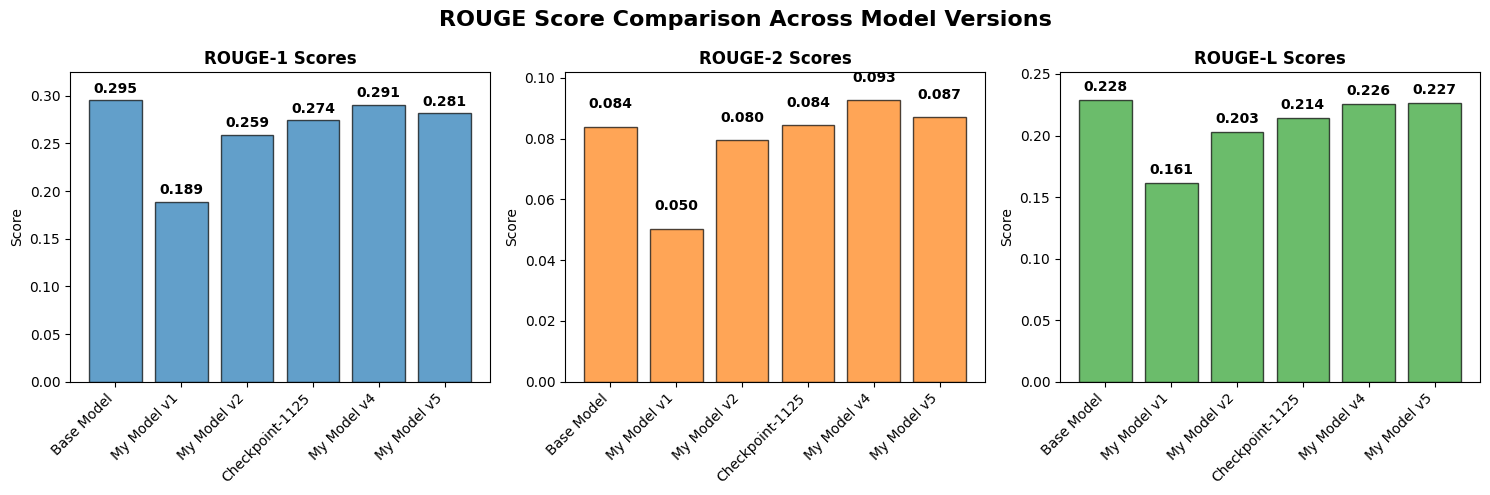

Plot saved to rouge_comparison.png

🏆 Best Model (by ROUGE-L): Base Model
   ROUGE-1: 0.2951
   ROUGE-2: 0.0839
   ROUGE-L: 0.2285


{'model_name': 'Base Model',
 'rouge1': np.float64(0.2950636640202298),
 'rouge2': np.float64(0.08393875626647311),
 'rougeL': np.float64(0.22847501177430413),
 'num_samples': 100,
 'timestamp': '2025-07-30T16:46:46.329431'}

In [ ]:
# Setup custom evaluation
evaluator = ModelEvaluator()

# Define specific models to compare
model_configs = [
    {'name': 'Base Model', 'type': 'base'},
    {'name': 'My Model v1', 'type': 'finetuned', 'path': './adapters/session1'},
    {'name': 'My Model v2', 'type': 'finetuned', 'path': './adapters/session2'},
    {'name': 'Checkpoint-1125', 'type': 'checkpoint', 'path': './checkpoint_dir/checkpoint-1125'},
    {'name': 'My Model v4', 'type': 'finetuned', 'path': './adapters/session4'},
    {'name': 'My Model v5', 'type': 'finetuned', 'path': './adapters/session5'}
]

# Run comparison
results = evaluator.compare_models(model_configs, num_samples=100)

# Analyze results
evaluator.create_comparison_table()
evaluator.plot_comparison()
evaluator.get_best_model()

# 💾 Project Backup and Download (Colab)

In this step, we create a **backup of the entire Colab project** and download it as a `.zip` file. This is useful for preserving trained models, logs, and datasets.

---

## 🔧 **Steps Performed:**
1. **Import Required Libraries:**
   - `google.colab.files` → For downloading files from Colab.
   - `shutil` & `os` → For file/directory handling and zipping.
   - `zipfile` → To customize and exclude unwanted folders.

2. **Create a Backup Zip File:**
   - Use `shutil.make_archive()` to create an initial `project_backup.zip` of the `/content` directory.

3. **Exclude `sample_data/` Folder:**
   - Create a new zip file using `zipfile.ZipFile` and **skip the `sample_data/` folder**, which is unnecessary.

4. **Download the Backup:**
   - Finally, use `files.download()` to download the zip archive to your local machine.

---

## ✅ **Key Points:**
- Ensures all project files, trained models, logs, and notebooks are saved.
- Excludes unwanted Colab default directories (`sample_data`).
- Creates a **clean, ready-to-share zip backup** of your workspace.

---

📥 **Output:**  
A downloadable file named `project_backup.zip` containing the entire project (excluding unnecessary folders).


In [ ]:
from google.colab import files
import shutil
import os

# Define the output zip name
zip_filename = "project_backup.zip"

# Exclude `sample_data/` and create zip
shutil.make_archive("project_backup", 'zip', "/content")

# Remove unwanted folder (sample_data) from the zip
import zipfile

# Create a new zip excluding sample_data
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as new_zip:
    for foldername, subfolders, filenames in os.walk("/content"):
        if "sample_data" in foldername:  # Skip sample_data folder
            continue
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            arcname = os.path.relpath(file_path, "/content")
            new_zip.write(file_path, arcname)

# Download the zip
files.download(zip_filename)
